In [41]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
seed = 17
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer, precision_score

import numpy as np # Numpy: biblioteca para manipular vetores e matrizes
import pandas as pd # Pandas: biblioteca para manipular tabelas
import scipy.stats as ss
from sklearn.metrics import confusion_matrix

from collections import Counter
import seaborn as sns
import time

In [27]:
df_data = pd.read_csv('preprocessed_scaled_data.csv', sep = ',')

In [28]:
df_data

,V1 interv.,V2 interv.,V3 interv.,V9 interv.,classe
0,0.171587,0.455103,0.099133,0.260932,0
1,0.155784,0.264438,0.110905,0.191950,0
2,0.208906,0.361578,0.100372,0.261428,0
3,0.183673,0.296441,0.124226,0.223556,0
4,0.660003,0.777186,0.945477,0.749584,0
...,...,...,...,...,...
18015,0.336225,0.922285,0.016109,0.533957,1
18016,0.025767,0.046434,0.047088,0.029310,1
18017,0.016566,0.050524,0.000000,0.021380,1
18018,0.011069,0.043772,0.000000,0.015086,1


In [29]:
df_data.columns

Index(['V1 interv.', 'V2 interv.', 'V3 interv.', 'V9 interv.', 'classe'], dtype='object')

In [30]:
df_data.var()

V1 interv.    0.102047
V2 interv.    0.116989
V3 interv.    0.165209
V9 interv.    0.115560
classe        0.250014
dtype: float64

In [31]:
df_target = df_data['classe']

In [32]:
df_data = df_data.drop(['classe'],axis=1)

In [33]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier



In [34]:
# Set a seed value
seed_value= 12321 
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

In [35]:
nn_model = MLPClassifier(hidden_layer_sizes=(30, 2),activation = 'relu',solver='adam',max_iter = 1000,random_state=seed_value,early_stopping=True,validation_fraction = 0.1)

In [57]:
# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

# Instantiate the machine learning classifiers
log_model = LogisticRegression(C=0.02,max_iter=10000)
svc_model = svm.SVC(kernel='linear')
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()
ada_model = AdaBoostClassifier(n_estimators=2)
k_model = KNeighborsClassifier()


# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
# ADICIONAR RNA (30 2)
# ativ Relu 

    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)
    ada =  cross_validate(ada_model, X, y, cv=folds, scoring=scoring)
    k_m = cross_validate(k_model, X, y, cv=folds, scoring=scoring)
    nn = cross_validate(nn_model, X, y, cv=folds, scoring=scoring)
    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()],
                                       'AdaBoost':[ada['test_accuracy'].mean(),
                                                              ada['test_precision'].mean(),
                                                              ada['test_recall'].mean(),
                                                              ada['test_f1_score'].mean()],
                                       'K Neighbors':[k_m['test_accuracy'].mean(),
                                                              k_m['test_precision'].mean(),
                                                              k_m['test_recall'].mean(),
                                                              k_m['test_f1_score'].mean()],
                                       'Multi Layer Perceptron':[nn['test_accuracy'].mean(),
                                                              nn['test_precision'].mean(),
                                                              nn['test_recall'].mean(),
                                                              nn['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(df_data, df_target, 10)

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,AdaBoost,K Neighbors,Multi Layer Perceptron,Best Score
Accuracy,0.808491,0.919145,0.987181,0.992342,0.611265,0.896060,0.992064,0.960155,Random Forest
Precision,0.756814,0.899852,0.988006,0.989745,0.628468,0.839266,0.988551,0.952843,Random Forest
Recall,0.909211,0.943285,0.986348,0.995005,0.544727,0.979910,0.995671,0.968258,K Neighbors
F1 Score,0.826012,0.921053,0.987174,0.992365,0.583511,0.904116,0.992096,0.960479,Random Forest


In [43]:
X= df_data
y= df_target

In [86]:
scorer = make_scorer(precision_score) # Teste outras
# Define dictionary with performance metrics
scorer2 = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

seed = seed_value

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

gscv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed_value)

algorithms = {
    'NeuNet': GridSearchCV(
        Pipeline([(
            'nn', MLPClassifier( solver='adam', early_stopping=True, random_state=seed,  max_iter=1000 ))]), 
        param_grid={
            'nn__activation': ['relu'],
            'nn__hidden_layer_sizes': [(30, 2)],
            'nn__validation_fraction': [0.1],
        },
        scoring=scorer,
        cv=gscv),
    
    'tree':  GridSearchCV(
        Pipeline([
            ('tree', DecisionTreeClassifier(random_state=seed))]), 
        param_grid={
            'tree__max_depth': [2, 4, 5],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    
    'bigtree':  GridSearchCV(
        Pipeline([
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=seed))]), 
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'kNN':  GridSearchCV(
        Pipeline([
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]), 
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring=scorer,
        cv=gscv),
    'nb': GridSearchCV(
        Pipeline([
            ('selector', SelectKBest()),
            ('nb', GaussianNB())]), 
        param_grid={
            'selector__k': [3, 5, 10],
        },
        scoring=scorer,
        cv=gscv),
    'svmlinear': GridSearchCV(
        Pipeline([
            ('svm', SVC(kernel='linear', random_state=seed))]), 
        param_grid={
            #'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),
    
    'svmrbf': GridSearchCV(
        Pipeline([
            ('svm', SVC(kernel='rbf', random_state=seed))]), 
        param_grid={
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),
    
    'forest': GridSearchCV(
        Pipeline([
            ('tree', RandomForestClassifier(random_state=seed)  )   ]), 
        param_grid={},
        scoring=scorer,
        cv=gscv),
    
    'Adaboost': GridSearchCV(
        Pipeline([
            ('adaboost', AdaBoostClassifier(n_estimators=2)  )   ]), 
        param_grid={},
        scoring=scorer,
        cv=gscv),
    'LogReg': GridSearchCV(
        Pipeline([
            ('LogRegression', LogisticRegression(C=0.02,max_iter=10000)  )   ]), 
        param_grid={},
        scoring=scorer,
        cv=gscv),
}
    

In [87]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
# df_balanced_stand, y_balanced 
result = {}
result_score = {}
i = 1
# X_train, X_test, y_train, y_test

for alg, clf in algorithms.items():
    start = time.time()
    print(f'Training with algorithm {i}: {alg}')
    i += 1
    #result[alg] = cross_val_predict(clf, X, y, n_jobs= -1,  cv=gscv)
    result_score[alg] = cross_validate(clf, X, y, n_jobs= -1,  cv=10, scoring =scorer2)
    #print(f'acuracia:{accuracy_score(y_train,result[alg]) } ')
    print(result_score[alg])
    print(f"it took {time.time() - start} seconds.")

Training with algorithm 1: NeuNet
{'fit_time': array([15.12145114,  9.05410695,  9.35298276, 12.53524494, 15.6437881 ,
       21.00697088, 21.84624791, 20.1665771 , 24.18841696, 30.1032939 ]), 'score_time': array([0.01891994, 0.01493406, 0.01496005, 0.0143342 , 0.01482296,
       0.01776409, 0.01666427, 0.01983786, 0.02034736, 0.00647211]), 'test_accuracy': array([0.97225305, 0.95504994, 0.96170921, 0.97891232, 0.97336293,
       0.95283019, 0.9600444 , 0.95504994, 0.96836848, 0.96892342]), 'test_precision': array([0.96401309, 0.94565217, 0.95315904, 0.98320269, 0.97760358,
       0.94060475, 0.9600444 , 0.94468547, 0.9741573 , 0.96276013]), 'test_recall': array([0.98113208, 0.96559378, 0.97114317, 0.97447281, 0.96892342,
       0.96670366, 0.9600444 , 0.96670366, 0.96226415, 0.97558269]), 'test_f1_score': array([0.97249725, 0.95551895, 0.96206707, 0.97881828, 0.97324415,
       0.95347564, 0.9600444 , 0.95556775, 0.9681742 , 0.969129  ])}
it took 65.8141520023346 seconds.
Training wit

In [88]:
for alg, clf in algorithms.items():
    print(f'========={alg}=========')
    print(f'Acuracia:  media:{result_score[alg]["test_accuracy"].mean():.4f} std:{result_score[alg]["test_accuracy"].std():0.4f} ')
    print(f'precisão:  media:{result_score[alg]["test_precision"].mean():.4f} std:{result_score[alg]["test_precision"].std():0.4f} ')
        
    print(f'test_recall:  media:{result_score[alg]["test_recall"].mean():.4f} std:{result_score[alg]["test_recall"].std():0.4f} ')
    print(f'test_f1_score:  media:{result_score[alg]["test_f1_score"].mean():.4f} std:{result_score[alg]["test_f1_score"].std():0.4f} ')

=========NeuNet=========
Acuracia:  media:0.9647 std:0.0085 
precisão:  media:0.9606 std:0.0139 
test_recall:  media:0.9693 std:0.0061 
test_f1_score:  media:0.9649 std:0.0083 
=========tree=========
Acuracia:  media:0.9628 std:0.0085 
precisão:  media:0.9459 std:0.0120 
test_recall:  media:0.9819 std:0.0103 
test_f1_score:  media:0.9635 std:0.0083 
=========bigtree=========
Acuracia:  media:0.9900 std:0.0027 
precisão:  media:0.9898 std:0.0039 
test_recall:  media:0.9901 std:0.0020 
test_f1_score:  media:0.9900 std:0.0027 
=========kNN=========
Acuracia:  media:0.9914 std:0.0030 
precisão:  media:0.9895 std:0.0049 
test_recall:  media:0.9933 std:0.0026 
test_f1_score:  media:0.9914 std:0.0029 
=========nb=========
Acuracia:  media:0.6048 std:0.0717 
precisão:  media:0.6407 std:0.1195 
test_recall:  media:0.5385 std:0.0125 
test_f1_score:  media:0.5802 std:0.0454 
=========svmlinear=========
Acuracia:  media:0.9217 std:0.0130 
precisão:  media:0.9050 std:0.0229 
test_recall:  media:0.9

In [89]:
for alg, clf in algorithms.items():
    print(f'========={alg}=========')
    print(f'score_time:  media:{result_score[alg]["score_time"].mean():.4f} std:{result_score[alg]["score_time"].std():0.4f} ')

=========NeuNet=========
score_time:  media:0.0159 std:0.0038 
=========tree=========
score_time:  media:0.0119 std:0.0029 
=========bigtree=========
score_time:  media:0.0115 std:0.0026 
=========kNN=========
score_time:  media:0.1570 std:0.0524 
=========nb=========
score_time:  media:0.0124 std:0.0048 
=========svmlinear=========
score_time:  media:0.5393 std:0.2368 
=========svmrbf=========
score_time:  media:0.6462 std:0.1452 
=========forest=========
score_time:  media:0.0555 std:0.0078 
=========Adaboost=========
score_time:  media:0.0216 std:0.0075 
=========LogReg=========
score_time:  media:0.0124 std:0.0021 


In [90]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
# df_balanced_stand, y_balanced 
result = {}
result_score = {}
i = 1
# X_train, X_test, y_train, y_test

for alg, clf in algorithms.items():
    start = time.time()
    print(f'Training with algorithm {i}: {alg}')
    i += 1
    result[alg] = cross_val_predict(clf, X, y, n_jobs= -1,  cv=gscv)
    #result_score[alg] = cross_validate(clf, X, y, n_jobs= -1,  cv=10, scoring =scorer2)
    #print(f'acuracia:{accuracy_score(y_train,result[alg]) } ')
    #print(result_score[alg])
    print(f"it took {time.time() - start} seconds.")

Training with algorithm 1: NeuNet
it took 14.337686777114868 seconds.
Training with algorithm 2: tree
it took 1.5872678756713867 seconds.
Training with algorithm 3: bigtree
it took 0.4220001697540283 seconds.
Training with algorithm 4: kNN
it took 18.093750953674316 seconds.
Training with algorithm 5: nb
it took 0.18475794792175293 seconds.
Training with algorithm 6: svmlinear
it took 16.88611388206482 seconds.
Training with algorithm 7: svmrbf
it took 47.63264989852905 seconds.
Training with algorithm 8: forest
it took 5.234009027481079 seconds.
Training with algorithm 9: Adaboost
it took 0.1642458438873291 seconds.
Training with algorithm 10: LogReg
it took 0.1590101718902588 seconds.


In [91]:
result = pd.DataFrame.from_dict(result)

result

,NeuNet,tree,bigtree,kNN,nb,svmlinear,svmrbf,forest,Adaboost,LogReg
0,0,0,0,0,1,1,0,0,0,1
1,0,0,0,0,1,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
18015,0,1,1,1,1,0,1,1,1,0
18016,1,1,1,1,1,1,1,1,1,1
18017,1,1,1,1,1,1,1,1,1,1
18018,1,1,1,1,1,1,1,1,1,1


In [92]:
def phi(a, b, expected):
    errors = np.logical_or(a != expected, b != expected)
    
    return np.count_nonzero(np.logical_and(a == b, errors)) / np.count_nonzero(errors)


# X_balanced, y_balanced
correrrors = np.ones((len(algorithms), len(algorithms)))

for i in range(len(algorithms)):
    for j in range(i + 1, len(algorithms)):
        correrrors[i, j] = phi(result[result.columns[i]], result[result.columns[j]], y)
        correrrors[j, i] = correrrors[i, j]    
        
print(correrrors)

[[1.         0.22513089 0.11714976 0.10691824 0.03266166 0.42857143
  0.30062112 0.13421053 0.19731978 0.15388874]
 [0.22513089 1.         0.1261034  0.10994764 0.02105126 0.12735089
  0.35333333 0.15921788 0.35110876 0.04337957]
 [0.11714976 0.1261034  1.         0.30388693 0.01467331 0.06583278
  0.21266968 0.37109375 0.04944501 0.0278168 ]
 [0.10691824 0.10994764 0.30388693 1.         0.00984197 0.0577957
  0.21836228 0.43661972 0.04305484 0.02119842]
 [0.03266166 0.02105126 0.01467331 0.00984197 1.         0.11524892
  0.00743545 0.00539568 0.07006066 0.41894793]
 [0.42857143 0.12735089 0.06583278 0.0577957  0.11524892 1.
  0.12177835 0.06648389 0.15587614 0.3139692 ]
 [0.30062112 0.35333333 0.21266968 0.21836228 0.00743545 0.12177835
  1.         0.30662983 0.14807091 0.04912573]
 [0.13421053 0.15921788 0.37109375 0.43661972 0.00539568 0.06648389
  0.30662983 1.         0.05712788 0.02101676]
 [0.19731978 0.35110876 0.04944501 0.04305484 0.07006066 0.15587614
  0.14807091 0.057127

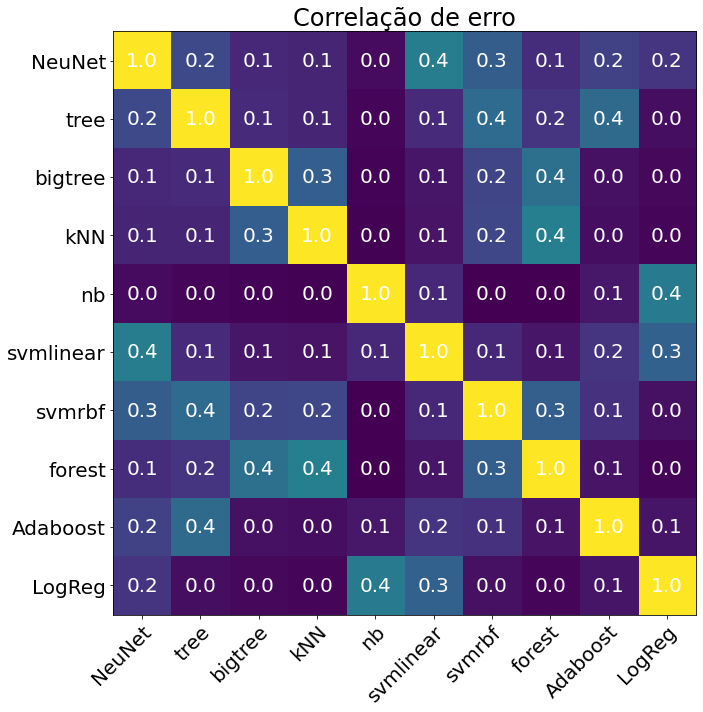

In [127]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.imshow(correrrors)

ax.set_xticks(np.arange(len(result.columns)))
ax.set_yticks(np.arange(len(result.columns)))
ax.set_xticklabels(result.columns, fontsize=20)
ax.set_yticklabels(result.columns, fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor", fontsize=20)

for i in range(len(result.columns)):
    for j in range(len(result.columns)):
        text = ax.text(j, i, round(correrrors[i, j], 1),
                       ha="center", va="center", color="w", fontsize=20)

ax.set_title("Correlação de erro", fontsize=24)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.tight_layout()
plt.show()

In [58]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.3, random_state=1)

y_train_pred = cross_val_predict(rfc_model, X_train, y_train, cv=10) # Random Forest Classifier



In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)

In [60]:
cm

array([[6232,   66],
       [  32, 6284]])

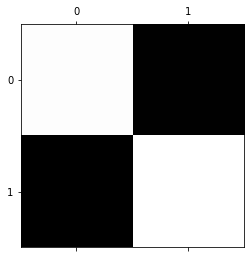

In [61]:
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

In [62]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

y_probas_forest = cross_val_predict(rfc_model, X_train, y_train, cv=10,method = "predict_proba") # Random Forest Classifier
y_probas_logistic = cross_val_predict(log_model, X_train, y_train, cv=10,method = "predict_proba") # Logistic Reg Classifier
y_probas_svc = cross_val_predict(svc_model, X_train, y_train, cv=10,method = "decision_function") # Support Vector M Classifier
y_probas_dtr = cross_val_predict(dtr_model, X_train, y_train, cv=10,method = "predict_proba") # Decision Tree Classifier
y_probas_gnb = cross_val_predict(gnb_model, X_train, y_train, cv=10,method = "predict_proba") # Gaussian NB Classifier
y_probas_ada = cross_val_predict(ada_model, X_train, y_train, cv=10,method = "predict_proba") # Adaboost Classifier
y_probas_k = cross_val_predict(k_model, X_train, y_train, cv=10,method = "predict_proba") # KNN Classifier
y_probas_nn = cross_val_predict(nn_model, X_train, y_train, cv=10,method = "predict_proba") # Multi L Perceptron Classifier

In [63]:
from sklearn.metrics import roc_curve
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
y_scores_logistic = y_probas_logistic[:, 1]

y_scores_dtr = y_probas_dtr[:, 1]
y_scores_gnb = y_probas_gnb[:, 1]
y_scores_ada = y_probas_ada[:, 1]
y_scores_k = y_probas_k[:, 1]
y_scores_nn = y_probas_nn[:, 1]



In [64]:
fpr_svc, tpr_svc , threshlds = roc_curve(y_train,y_probas_svc)

In [65]:
fpr_randomforest, tpr_randomforest, thresholds_randomforest = roc_curve(y_train,y_scores_forest)
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_train,y_scores_logistic)
fpr_dtr, tpr_dtr, thresholds_dtr = roc_curve(y_train,y_scores_dtr)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_train,y_scores_gnb)
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_train,y_scores_ada)
fpr_k, tpr_k, thresholds_k = roc_curve(y_train,y_scores_k)
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_train,y_scores_nn)

In [66]:
def plot_roc_curve(fpr, tpr, label=None):
    if label == 'MLP':
        plt.plot(fpr, tpr,'r--', label=label)
    elif label == 'SVM':
        plt.plot(fpr, tpr,'--', linewidth=2, label=label)
    else:
        plt.plot(fpr, tpr,label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal

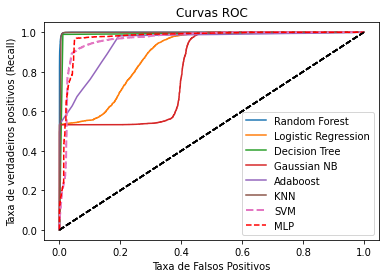

<Figure size 432x288 with 0 Axes>

In [68]:
fig = plt.figure()
plt.title('Curvas ROC')
plot_roc_curve(fpr_randomforest, tpr_randomforest, "Random Forest")
plot_roc_curve(fpr_logistic, tpr_logistic, "Logistic Regression")
plot_roc_curve(fpr_dtr, tpr_dtr, "Decision Tree")
plot_roc_curve(fpr_gnb, tpr_gnb, "Gaussian NB")
plot_roc_curve(fpr_ada, tpr_ada, "Adaboost")
plot_roc_curve(fpr_k, tpr_k, "KNN")
plot_roc_curve(fpr_svc, tpr_svc, "SVM")
plot_roc_curve(fpr_nn, tpr_nn,"MLP")

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de verdadeiros positivos (Recall)')
plt.legend(loc="lower right")
plt.show()

plt.draw()
fig.savefig('ROCSs.png', dpi=300)

### Avaliando KNN, MLP e Decision Tree

In [70]:
y = df_target.to_numpy()

In [71]:
X = df_data.to_numpy()

In [72]:
X

array([[0.17158669, 0.45510344, 0.09913259, 0.26093196],
       [0.15578429, 0.26443761, 0.11090458, 0.19194971],
       [0.20890568, 0.36157769, 0.10037175, 0.26142833],
       ...,
       [0.01656554, 0.05052441, 0.        , 0.02137966],
       [0.01106851, 0.04377152, 0.        , 0.01508576],
       [0.01531226, 0.0476198 , 0.        , 0.01969822]])

In [73]:
y.shape

(18020,)

In [74]:
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.model_selection import validation_curve

In [75]:
szes = np.linspace(100,18020)

In [76]:
szes.shape

(50,)

In [77]:
szes = szes/18020

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = svc_model,
X = X, y = y, train_sizes = szes, cv = 10, 
shuffle = True, random_state = 45,scoring = 'precision')


In [ ]:
train_scores_svc_mean = train_scores.mean(axis = 1)
validation_scores_svc_mean = validation_scores.mean(axis = 1)

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = nn_model,
X = X, y = y, train_sizes = szes, cv = 10, 
shuffle = True, random_state = 45,scoring = 'precision')

In [ ]:
train_scores_NN_mean = train_scores.mean(axis = 1)
validation_scores_NN_mean = validation_scores.mean(axis = 1)

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = dtr_model,
X = X, y = y, train_sizes = szes, cv = 10, 
shuffle = True, random_state = 45,scoring = 'precision')

In [ ]:
train_scores_dtr_mean = train_scores.mean(axis = 1)
validation_scores_dtr_mean = validation_scores.mean(axis = 1)

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = k_model,
X = X, y = y, train_sizes = szes, cv = 10, 
shuffle = True, random_state = 45,scoring = 'precision')

In [ ]:
train_scores_knn_mean = train_scores.mean(axis = 1)
validation_scores_knn_mean = validation_scores.mean(axis = 1)

In [ ]:
fig2 = plt.figure()
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, '*-', label = 'Treino SVM')
plt.plot(train_sizes, validation_scores_mean,'--', label = 'Validação SVM')
plt.plot(train_sizes, train_scores_dtr_mean, '*-', label = 'Treino Decision Tree')
plt.plot(train_sizes, validation_scores_dtr_mean,'--', label = 'Validação Decision Tree')
plt.plot(train_sizes, train_scores_knn_mean, '*-', label = 'Treino KNN')
plt.plot(train_sizes, validation_scores_knn_mean,'--', label = 'Validação KNN')
#plt.fill_between(train_sizes, train_scores_dtr_mean, validation_scores_dtr_mean, color="yellow", alpha=0.3)
plt.ylabel('Precisão', fontsize = 14)
plt.xlabel('Tamanho do dataset de treino', fontsize = 14)
plt.title('Curvas de aprendizado', fontsize = 18, y = 1.03)
plt.legend()

plt.draw()
fig2.savefig('LearningCurves.png', dpi=300)

In [ ]:
fig3 = plt.figure()
plt.style.use('seaborn')
#plt.plot(train_sizes, train_scores_mean, '*-', label = 'Treino SVM')
#plt.plot(train_sizes, validation_scores_mean,'--', label = 'Validação SVM')
plt.plot(train_sizes, train_scores_NN_mean,'*-', label = 'Treino MLP')
plt.plot(train_sizes, validation_scores_NN_mean,'--', label = 'Validação MLP')
plt.plot(train_sizes, train_scores_dtr_mean, '*-', label = 'Treino Decision Tree')
plt.plot(train_sizes, validation_scores_dtr_mean,'--', label = 'Validação Decision Tree')
plt.plot(train_sizes, train_scores_knn_mean, '*-', label = 'Treino KNN')
plt.plot(train_sizes, validation_scores_knn_mean,'--', label = 'Validação KNN')
plt.fill_between(train_sizes, train_scores_dtr_mean, validation_scores_dtr_mean, color="grey", alpha=0.3)
#plt.fill_between(train_sizes, train_scores_knn_mean, validation_scores_knn_mean, color="red", alpha=0.3)
#plt.fill_between(train_sizes, train_scores_mean, validation_scores_mean, color="green", alpha=0.3)
plt.ylabel('Precisão', fontsize = 14)
plt.xlabel('Tamanho do dataset de treino', fontsize = 14)
plt.title('Curvas de aprendizado', fontsize = 18, y = 1.03)
plt.legend()

plt.draw()
fig3.savefig('LearningCurves_colored.png', dpi=400)